# DATASET DESCRIPTION


# IMPORTING LIBRARIES

In [54]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import FunctionTransformer  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score 

# 2: Reading Data

In [55]:
heart_data = pd.read_csv("C:/Users/Ayaan/Desktop/heart-2.csv")

# EXPLORING DATA

In [56]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [58]:
heart_data.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
689,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
577,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
139,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1


In [59]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [60]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [61]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
heart_data.shape

(1025, 14)

In [63]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [64]:
heart_data["target"].unique()

array([0, 1], dtype=int64)

In [65]:
heart_data["target"].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [66]:
heart_data["target"].value_counts().rename("count"),
heart_data["target"].value_counts(normalize=True).rename("%").mul(100)

target
1    51.317073
0    48.682927
Name: %, dtype: float64

Text(0.5, 1.0, 'Heart Disease Target Distribution')

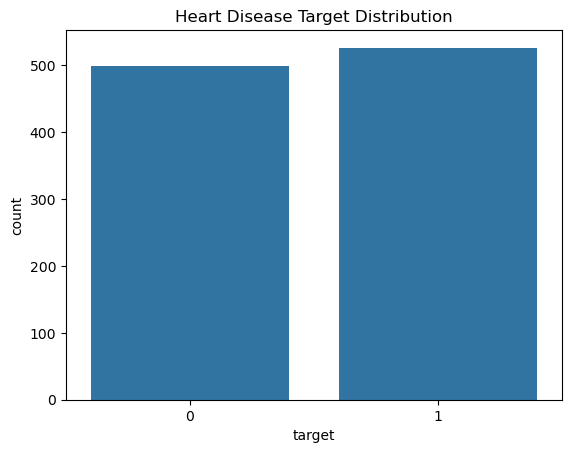

In [67]:
sns.countplot(data=heart_data, x="target")
plt.title("Heart Disease Target Distribution")


# FEATURE NAME

In [68]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# MISSING VALUES

In [69]:
heart_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [71]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
print("Missing data sum :")
print(heart_data.isnull().sum())

print("\nMissing data percentage (%):")
print(heart_data.isnull().sum() / heart_data.count() * 100)

Missing data sum :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing data percentage (%):
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


# SEPRATE CATEGORICAL AND NUMERICAL FEATURES

In [73]:
cat_features = [feature for feature in heart_data.columns if heart_data[feature].nunique() < 10]
print("Number of categorical variables: ", len(cat_features))
print()
print("Categorical variables column name:", cat_features)

Number of categorical variables:  9

Categorical variables column name: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [74]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,sex
1,cp
2,fbs
3,restecg
4,exang


In [75]:
numerical_features = [feature for feature in heart_data.columns if heart_data[feature].dtypes != "O"]
print("Number of numerical variables: ", len(numerical_features))
print()
print("Numerical Variables Column: ", numerical_features)

Number of numerical variables:  14

Numerical Variables Column:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [76]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [77]:
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# CHECKING DUBLICATE VALUES

In [78]:
heart_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [79]:
heart_data.duplicated().sum()

723

In [80]:
heart_data["chol"].nunique()

152

In [81]:
heart_data["chol"].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141], dtype=int64)

# VISUALIZUNG CATEGORICAL FEATURES

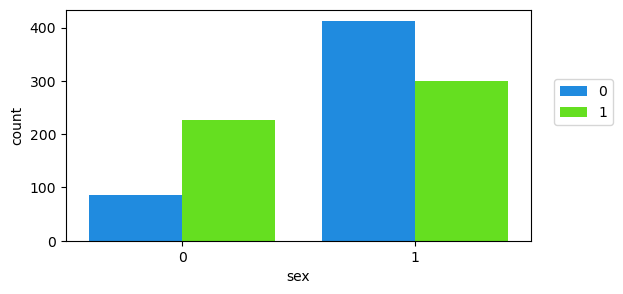

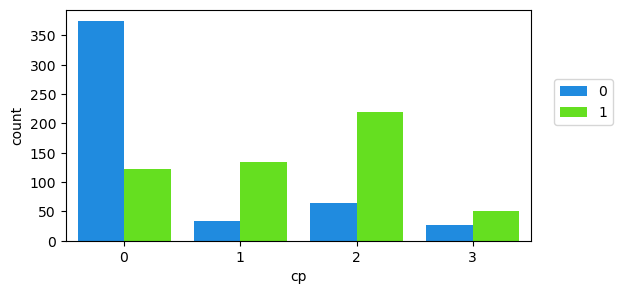

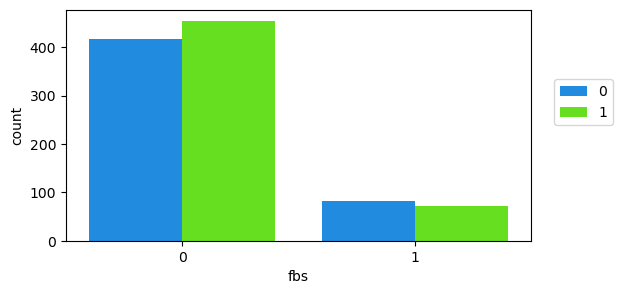

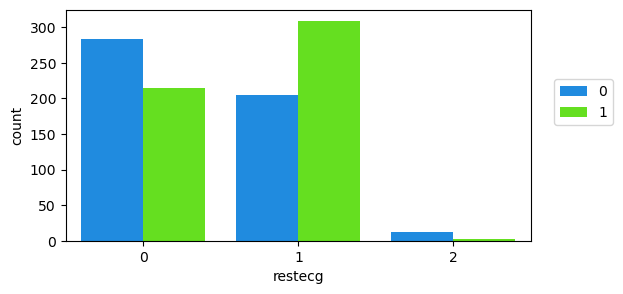

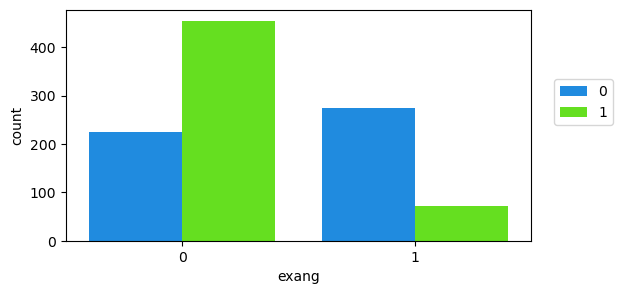

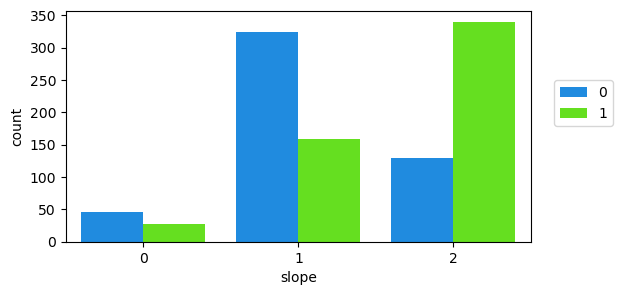

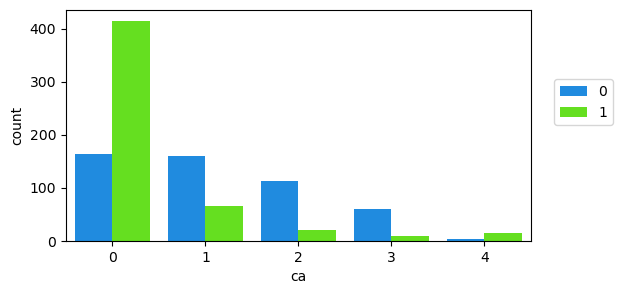

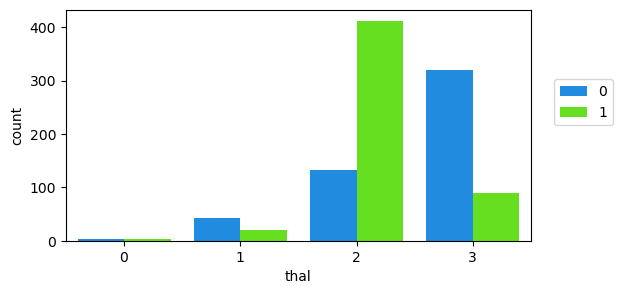

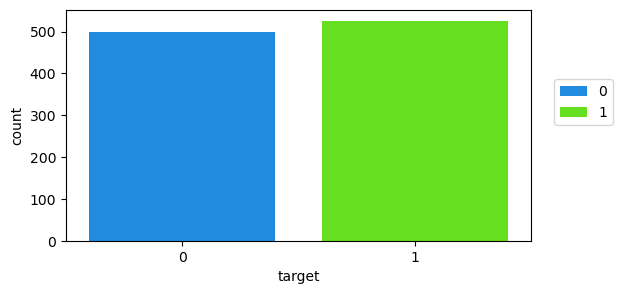

In [82]:
for col in cat_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=heart_data, x=col, hue="target", palette="gist_rainbow_r")
    plt.legend(loc=(1.05, 0.5))

# Outlier Detection and Removal

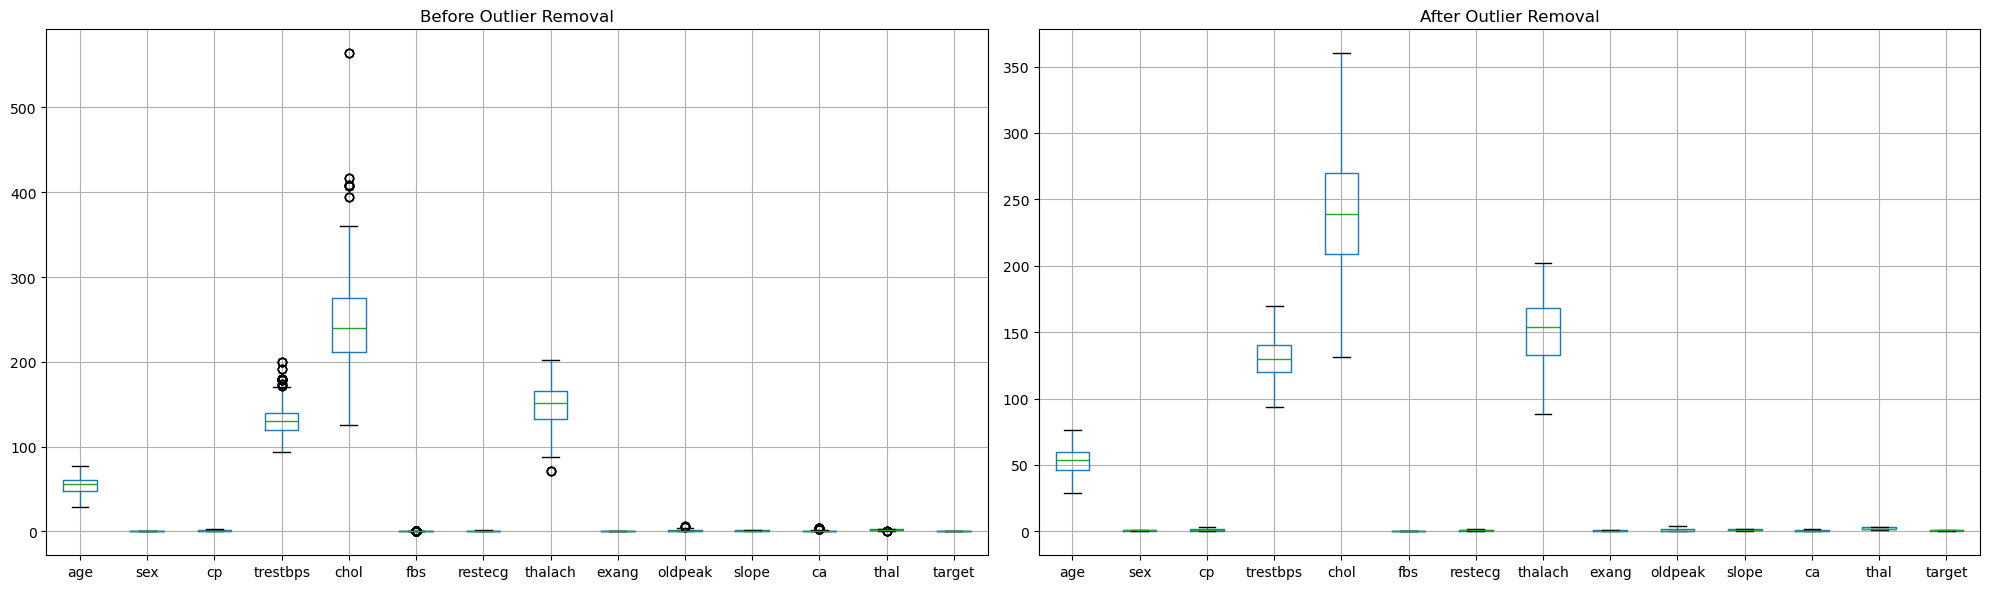

In [83]:
numeric_cols = heart_data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

heart_data_cleaned = heart_data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
heart_data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


# Data Transformation

- Normalization

In [85]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = heart_data.select_dtypes(include=[np.number])
non_numeric_cols = heart_data.select_dtypes(exclude=[np.number])

scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
scaled_data.head()


(1025, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


- Standardization

In [86]:
from sklearn.preprocessing import StandardScaler

numeric_cols = heart_data.select_dtypes(include=[np.number])
non_numeric_cols = heart_data.select_dtypes(exclude=[np.number])

scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
scaled_data.head()


(1025, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698


# FEATURE SELECTION

In [87]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

X = heart_data.drop(columns=["target"])
y = heart_data["target"]
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# SPLITTING

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# DECISION TREE

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


### CLASSIFICATION REPORT

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



### Confusion Matrix

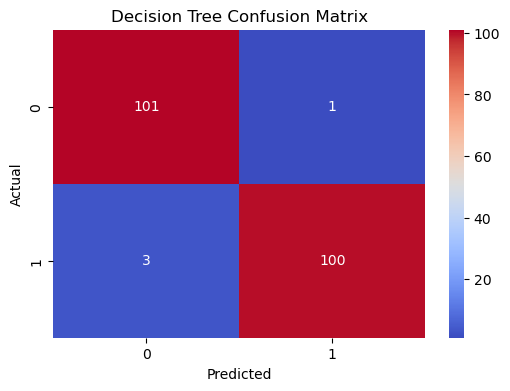

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [92]:
y_pred_test = clf.predict(X_test)

test = pd.DataFrame({
    "Actual": y_test,
    "Y test predicted": y_pred_test
})

In [93]:
test.head(5)

,Actual,Y test predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


# RANDOM FOREST

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

### CLASSIFICATION REPORT

In [95]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



### Confusion Matrix

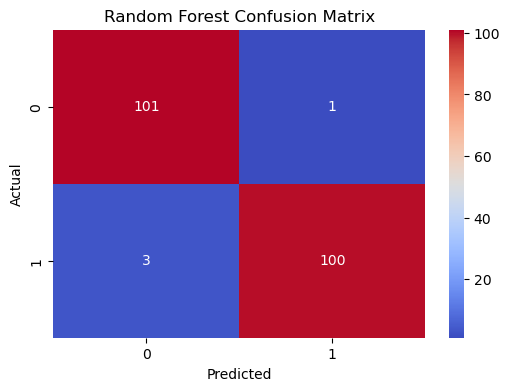

In [96]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [97]:
y_pred_test_rf = rf_clf.predict(X_test)

test_rf = pd.DataFrame({
    "Actual": y_test,
    "Y test predicted": y_pred_test_rf
})

In [98]:
test.head(5)

,Actual,Y test predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


# ANN

In [99]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

C:\Users\Ayaan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5707 - loss: 0.7521 - val_accuracy: 0.5415 - val_loss: 0.6571
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5411 - loss: 0.6606 - val_accuracy: 0.7122 - val_loss: 0.6120
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6544 - loss: 0.6125 - val_accuracy: 0.7512 - val_loss: 0.5875
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7768 - loss: 0.5741 - val_accuracy: 0.7024 - val_loss: 0.5871
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6894 - loss: 0.5893 - val_accuracy: 0.7415 - val_loss: 0.5516
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8089 - loss: 0.5189 - val_accuracy: 0.6829 - val_loss: 0.5921
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7430 - loss: 0.5339 - val_accuracy: 0.7756 - val_loss: 0.5163
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8200 - loss: 0.4809 - val_accuracy: 0.7805 - val_loss

### CLASSIFICATION REPORT

In [101]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       102
           1       0.74      0.89      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.78      0.78       205
weighted avg       0.80      0.79      0.78       205



### Confusion Matrix

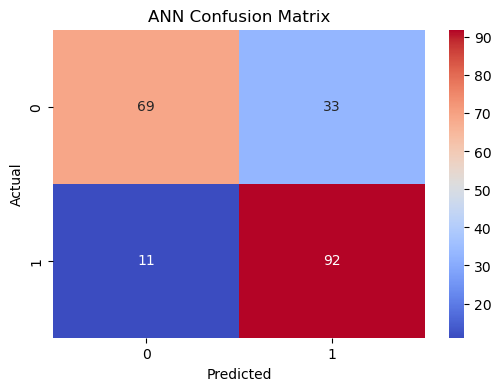

In [102]:
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ANN Confusion Matrix")
plt.show()
